<a href="https://colab.research.google.com/github/selua/Cat_vs_Dog/blob/main/Cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-11-07 15:47:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   159MB/s    in 0.4s    

2020-11-07 15:47:27 (159 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile as zf
import os
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
zf_file = '/tmp/cats_and_dogs_filtered.zip'
file1 = zf.ZipFile(zf_file,'r')
file1.extractall('/tmp/')
file1.close()

In [6]:
os.listdir('/tmp/cats_and_dogs_filtered/')

['train', 'validation', 'vectorize.py']

In [7]:
train = '/tmp/cats_and_dogs_filtered/train/'
validation = '/tmp/cats_and_dogs_filtered/validation/'

In [17]:
cat_img_path = []
for img in os.listdir('/tmp/cats_and_dogs_filtered/train/cats/')[0:5]:
  cat_img_path.append(os.path.join('/tmp/cats_and_dogs_filtered/train/cats/',img))

dog_img_path = []
for img in os.listdir('/tmp/cats_and_dogs_filtered/train/dogs/')[0:5]:
  dog_img_path.append(os.path.join('/tmp/cats_and_dogs_filtered/train/dogs/',img))


img_path = cat_img_path + dog_img_path

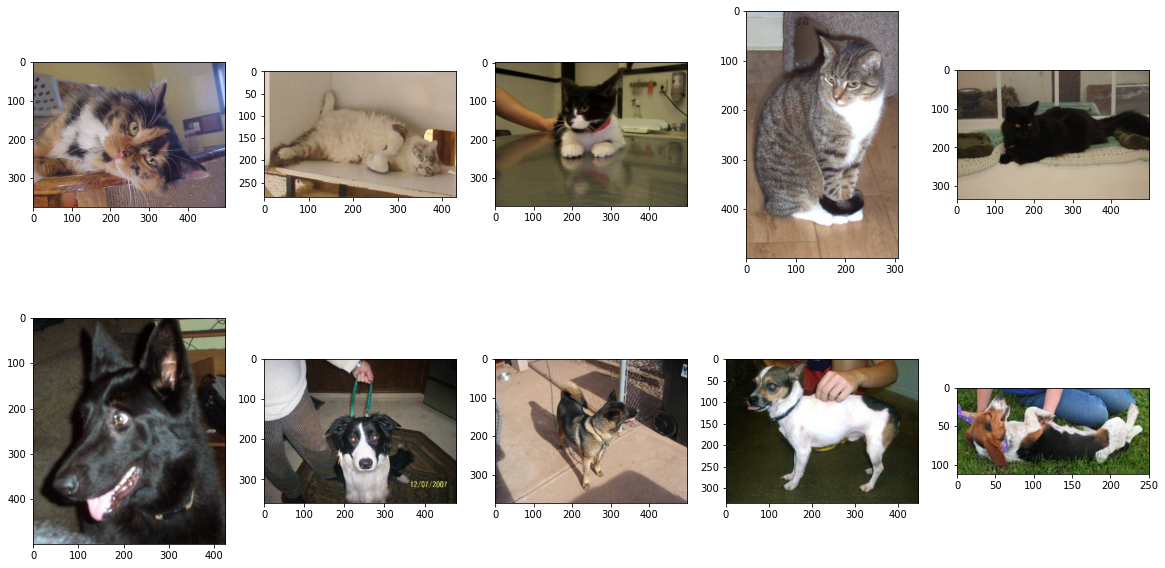

In [23]:
fig = plt.figure(figsize = (20,10))

for i, img in enumerate(img_path):
    plt.subplot(2, 5, i + 1)
    img = mpimg.imread(img)
    plt.imshow(img)

In [28]:
model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 128)      

In [31]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [33]:
train_datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=40,shear_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [34]:
train_generator = train_datagen.flow_from_directory(train,target_size=(300,300),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [37]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation,
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit(
      train_generator,
      steps_per_epoch=63,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
63/63 - 41s - loss: 0.6284 - accuracy: 0.6375 - val_loss: 0.6004 - val_accuracy: 0.6820
Epoch 2/100
63/63 - 41s - loss: 0.6105 - accuracy: 0.6620 - val_loss: 0.6222 - val_accuracy: 0.6340
Epoch 3/100
63/63 - 41s - loss: 0.5855 - accuracy: 0.6900 - val_loss: 0.5683 - val_accuracy: 0.7050
Epoch 4/100
63/63 - 41s - loss: 0.5845 - accuracy: 0.6975 - val_loss: 0.5829 - val_accuracy: 0.6800
Epoch 5/100
63/63 - 42s - loss: 0.5677 - accuracy: 0.7015 - val_loss: 0.5560 - val_accuracy: 0.7110
Epoch 6/100
63/63 - 41s - loss: 0.5511 - accuracy: 0.7140 - val_loss: 0.5536 - val_accuracy: 0.7090
Epoch 7/100
63/63 - 41s - loss: 0.5376 - accuracy: 0.7335 - val_loss: 0.5439 - val_accuracy: 0.7320
Epoch 8/100
63/63 - 41s - loss: 0.5293 - accuracy: 0.7375 - val_loss: 0.6392 - val_accuracy: 0.6810
Epoch 9/100
63/63 - 41s - loss: 0.5257 - accuracy: 0.7430 - val_loss: 0.5387 - val_accuracy: 0.7200
Epoch 10/100
63/63 - 41s - loss: 0.5187 - accuracy: 0.7450 - val_loss: 0.5454 - val_accuracy: 0.7010

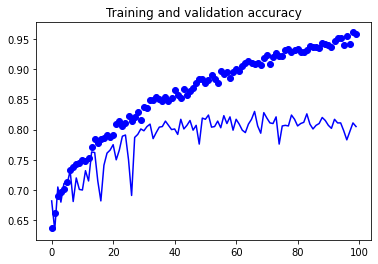

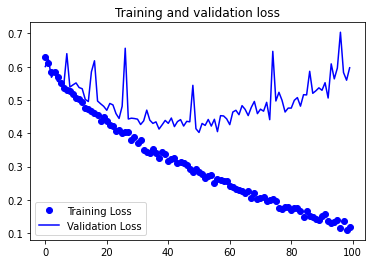

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()